Hello friends i here to do the project on cnn 
The project based on happy or sad face

loading necessary libraries

In [24]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout
import cv2
import torch

In [3]:
import cv2
import os
import matplotlib.pyplot as plt
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
            if(len(images)==20):
                return images
    return images

In [4]:
path="test"
data=load_images_from_folder("C:/Users/LENOVO/Documents/happy and sad/test/happy")


In [5]:
train_dir="C:/Users/LENOVO/Documents/happy and sad/train"
test_dir="C:/Users/LENOVO/Documents/happy and sad/test"

It is for training image directory . here i train the data with the batch size of 32 ad label model as categorical because (happy and sad)

In [6]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(48,48),  # Resize all images to 224x224
    batch_size=32,          # Batch size
    label_mode='categorical'  # Label mode can be "int", "categorical", or "binary"
)

Found 12045 files belonging to 2 classes.


here it is the test dataset here we proprocess the image dataset and load the data in the directory and change the image size and batch size is 32 and label model is categorical

In [7]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(48,48),  # Resize all images to 224x224
    batch_size=32,          # Batch size
    label_mode='categorical'  # Label mode can be "int", "categorical", or "binary"
)

Found 3021 files belonging to 2 classes.


Here we create the convolution modal 

In [8]:
model=Sequential([
    Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(48,48,3)),
    Conv2D(64,kernel_size=(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Conv2D(128,kernel_size=(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(128,kernel_size=(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),    

    Flatten(),
    Dense(1024,activation='relu'),
    Dropout(0.5),
    Dense(2,activation='sigmoid')
])

c:\Users\LENOVO\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(loss="binary_crossentropy",optimizer="Adam",metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 44, 44, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         2,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,341,058 (8.93 MB)

 Trainable params: 2,341,058 (8.93 MB)

 Non-trainable params: 0 (0.00 B)

Here we train the modal

In [11]:
history=model.fit(train_dataset,epochs=50,steps_per_epoch=28709//64,validation_steps=7178//64)

Epoch 1/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 38s 75ms/step - accuracy: 0.5816 - loss: 2.6844
Epoch 2/50
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:01 139ms/step - accuracy: 0.5625 - loss: 0.6887

C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2032.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


448/448 ━━━━━━━━━━━━━━━━━━━━ 33s 73ms/step - accuracy: 0.6041 - loss: 0.6709
Epoch 3/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 30s 68ms/step - accuracy: 0.6071 - loss: 0.6716
Epoch 4/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 50s 112ms/step - accuracy: 0.6058 - loss: 0.6707
Epoch 5/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 26s 58ms/step - accuracy: 0.6038 - loss: 0.6738
Epoch 6/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 26s 57ms/step - accuracy: 0.6024 - loss: 0.6727
Epoch 7/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 26s 58ms/step - accuracy: 0.6076 - loss: 0.6717
Epoch 8/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 26s 59ms/step - accuracy: 0.6074 - loss: 0.6700
Epoch 9/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 27s 59ms/step - accuracy: 0.6032 - loss: 0.6718
Epoch 10/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 27s 59ms/step - accuracy: 0.6110 - loss: 0.6685
Epoch 11/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 27s 60ms/step - accuracy: 0.6066 - loss: 0.6722
Epoch 12/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 27s 59ms/step - accuracy: 0.6113 - loss: 0.6704
Epoch 13/50
448/448 ━━━━━━━━━━━━━━━━━━━

give the prediction

In [12]:
model.predict(test_dataset)

95/95 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step


array([[5.5111089e-12, 1.0000000e+00],
       [7.2352499e-01, 2.6908401e-01],
       [4.8197275e-03, 9.9506462e-01],
       ...,
       [9.9999511e-01, 5.4216816e-06],
       [1.1652102e-03, 9.9888873e-01],
       [1.0000000e+00, 2.3243452e-09]], dtype=float32)

Here we plot the data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


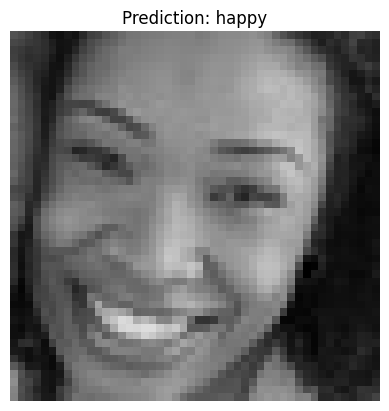

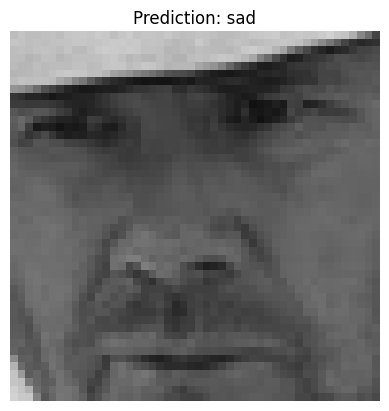

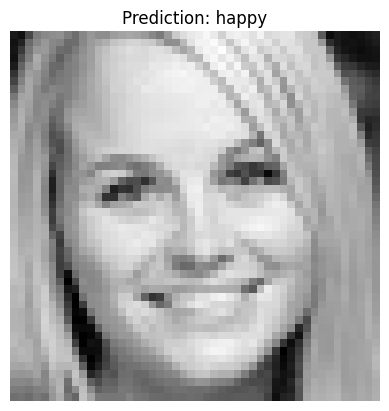

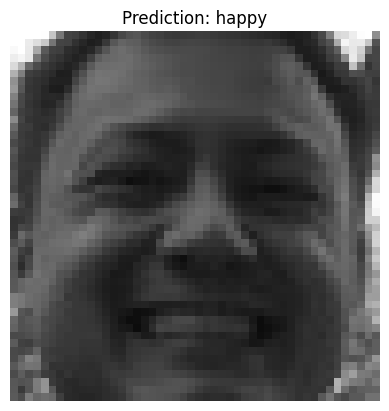

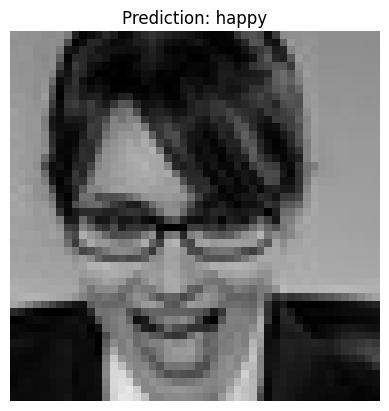

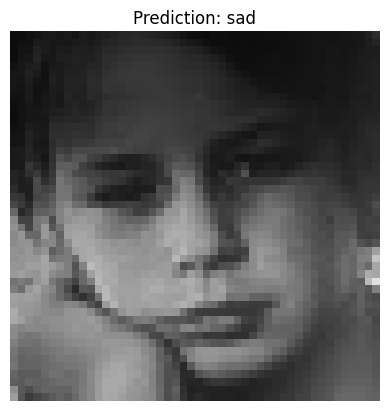

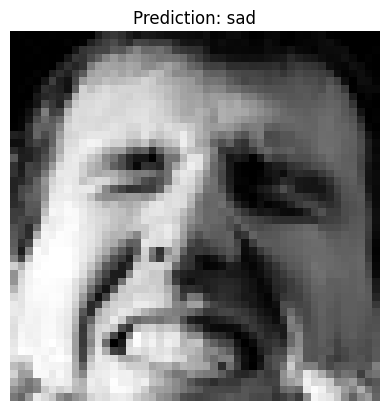

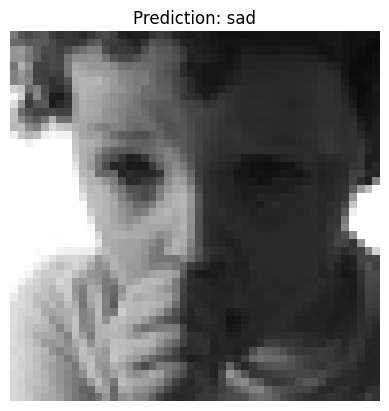

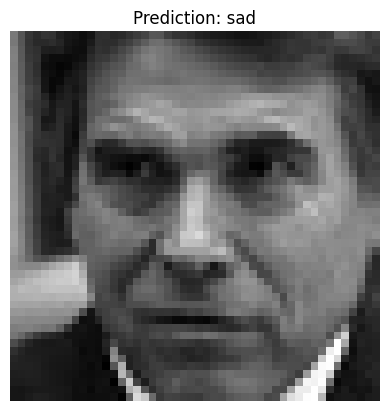

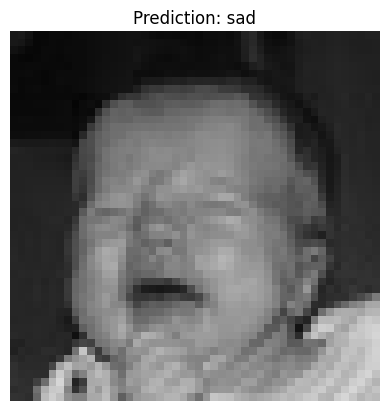

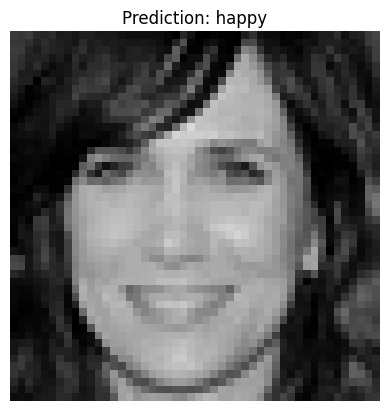

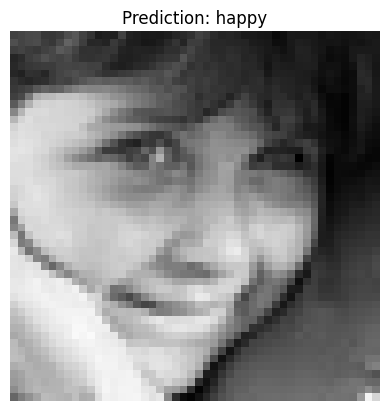

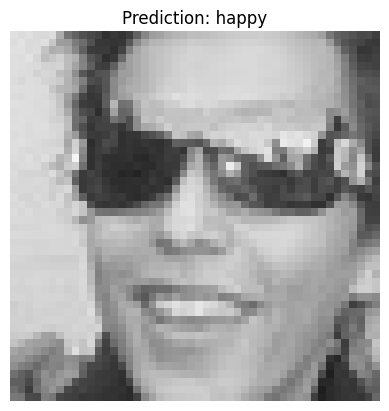

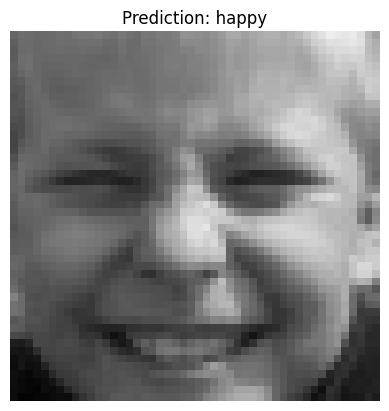

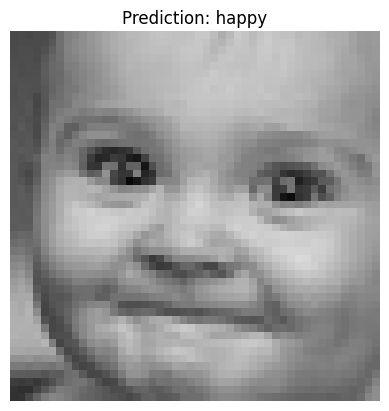

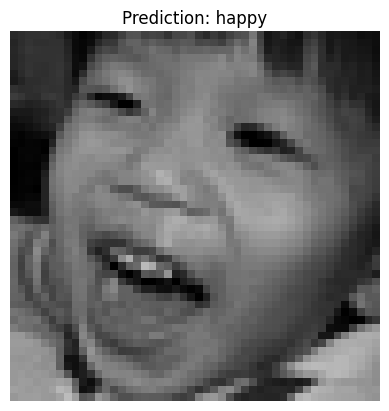

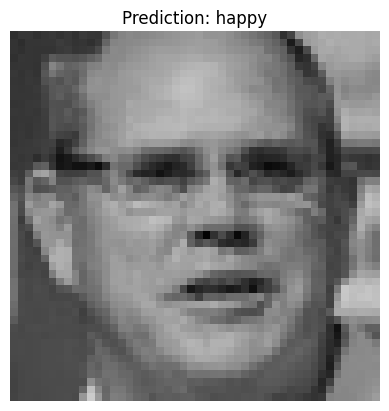

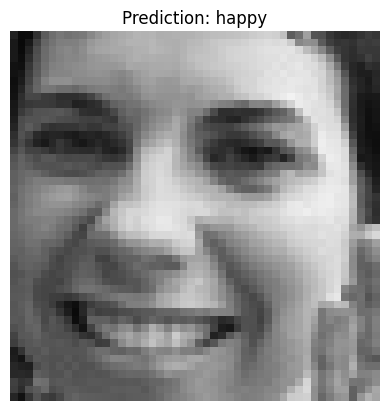

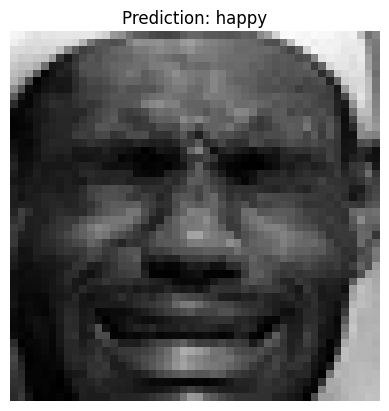

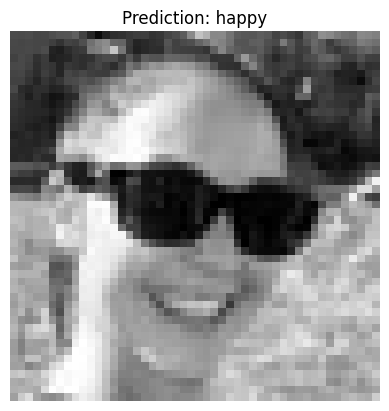

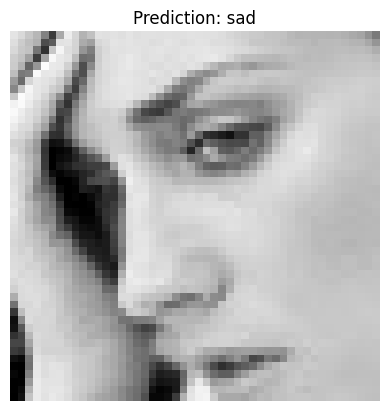

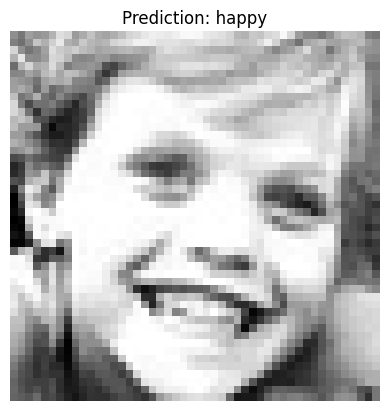

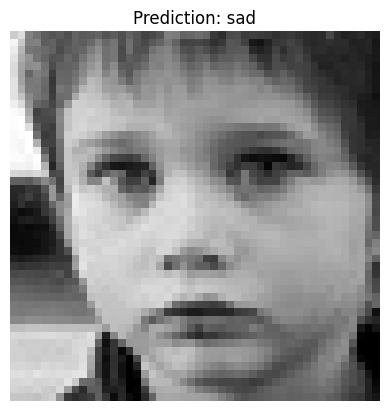

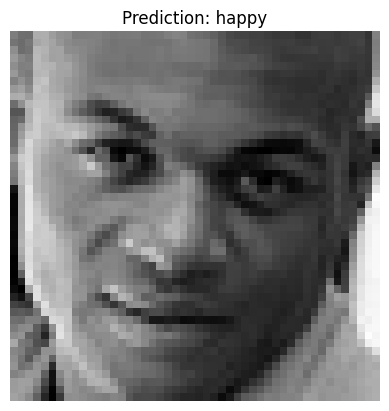

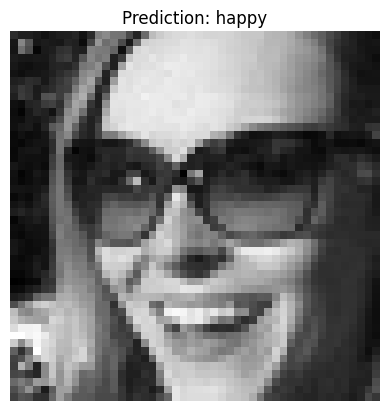

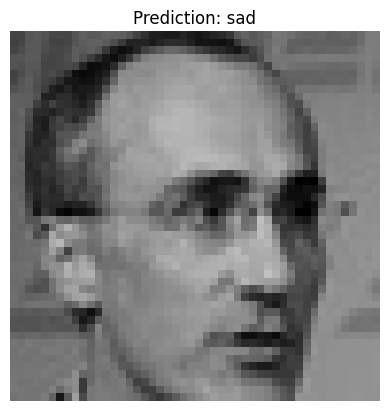

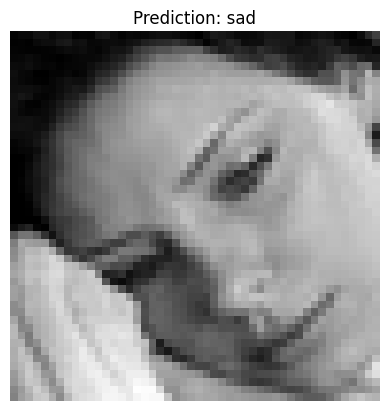

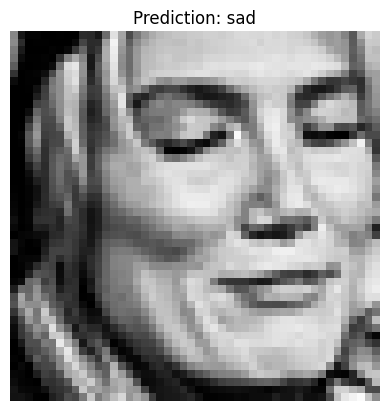

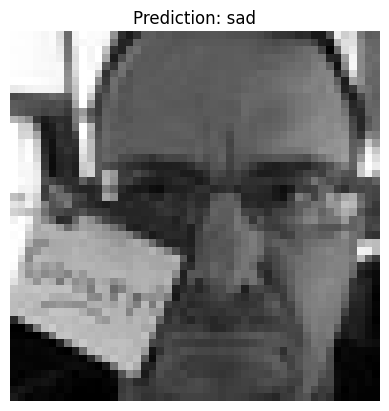

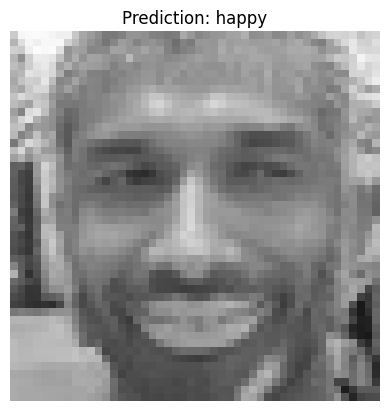

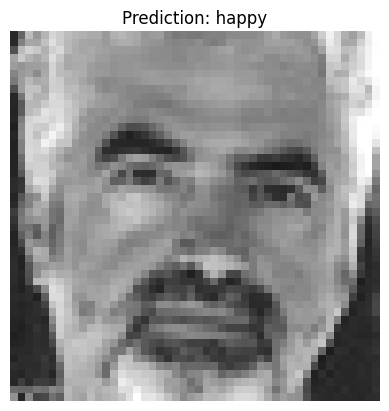

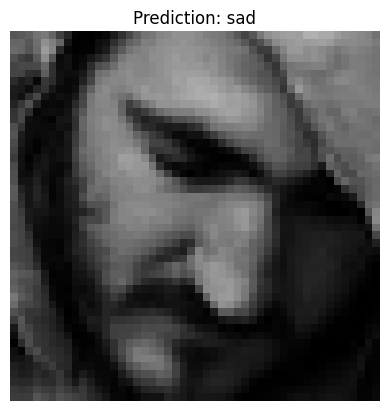

In [13]:
# %% Predict and display results
import numpy as np
import matplotlib.pyplot as plt
class_names = ["happy", "sad"]

# Function to display an image and the predicted label
def display_prediction(image, prediction):
    plt.imshow(image / 255.0)  # Normalize pixel values for display
    plt.title(f"Prediction: {class_names[np.argmax(prediction)]}")
    plt.axis('off')
    plt.show()

# %% Predict on test dataset
for images, labels in test_dataset.take(1):  # Get a batch from the test dataset
    predictions = model.predict(images)
    for i in range(len(images)):
        display_prediction(images[i].numpy(), predictions[i])


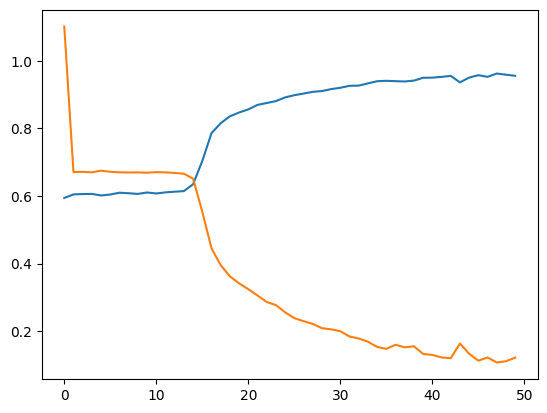

In [18]:
plt.plot(history.history['accuracy'],label="training")
plt.plot(history.history['loss'],label="validation")

In [20]:
help(model.save)

Help on method save in module keras.src.models.model:

save(filepath, overwrite=True, zipped=None, **kwargs) method of keras.src.models.sequential.Sequential instance
    Saves a model as a `.keras` file.
    
    Args:
        filepath: `str` or `pathlib.Path` object.
            The path where to save the model. Must end in `.keras`
            (unless saving the model as an unzipped directory
            via `zipped=False`).
        overwrite: Whether we should overwrite any existing model at
            the target location, or instead ask the user via
            an interactive prompt.
        zipped: Whether to save the model as a zipped `.keras`
            archive (default when saving locally), or as an
            unzipped directory (default when saving on the
            Hugging Face Hub).
    
    Example:
    
    ```python
    model = keras.Sequential(
        [
            keras.layers.Dense(5, input_shape=(3,)),
            keras.layers.Softmax(),
        ],
    )
    mod

In [21]:
model.save("model.keras")

In [32]:
import keras

In [33]:
keras.saving.load_model("model.keras")

<Sequential name=sequential, built=True>

In [34]:
model.predict(test_dataset)

95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step


array([[9.0556979e-01, 9.1232970e-02],
       [9.9998957e-01, 1.1238282e-05],
       [1.6613163e-01, 8.4132981e-01],
       ...,
       [1.4452117e-04, 9.9986392e-01],
       [9.9973494e-01, 3.0747885e-04],
       [1.0000000e+00, 2.5031027e-21]], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


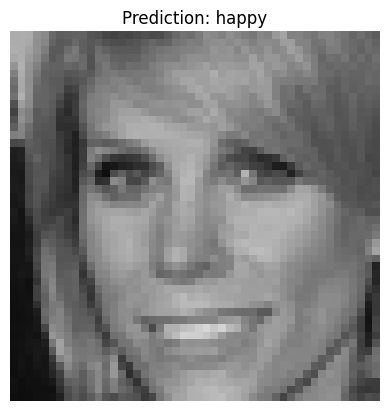

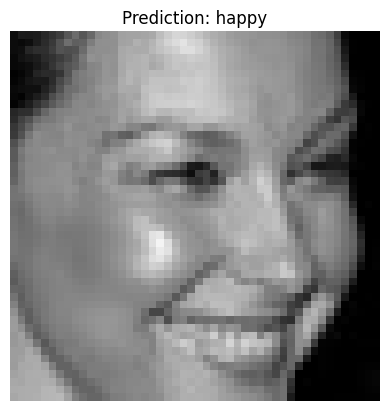

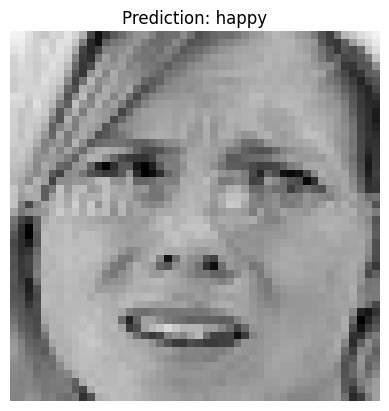

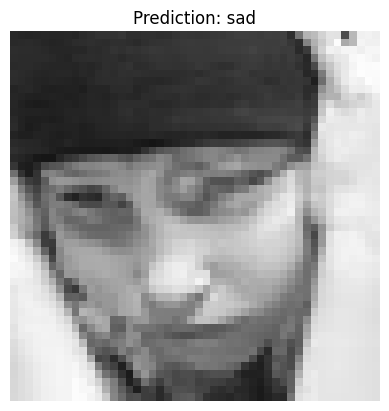

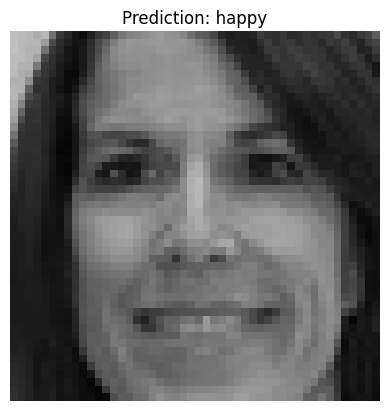

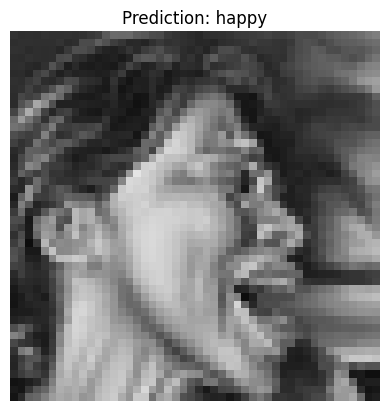

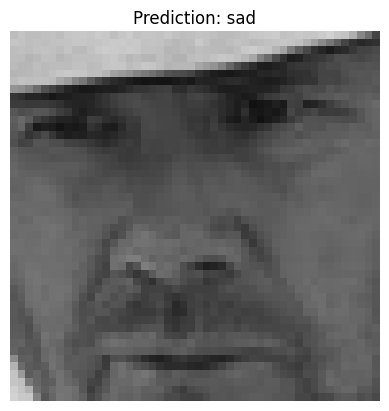

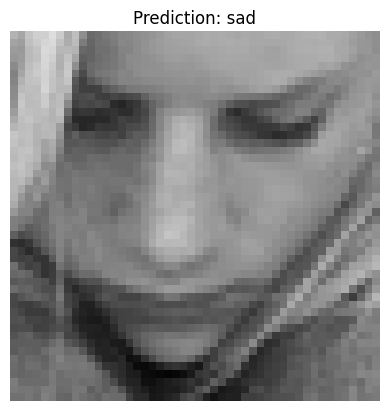

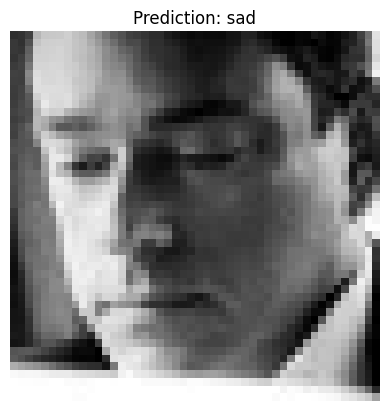

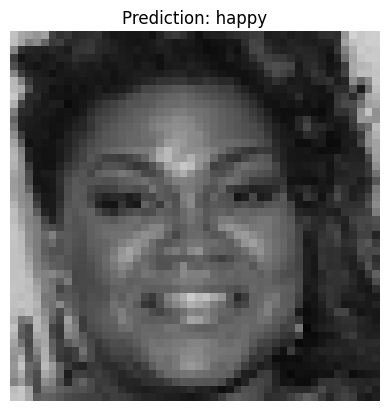

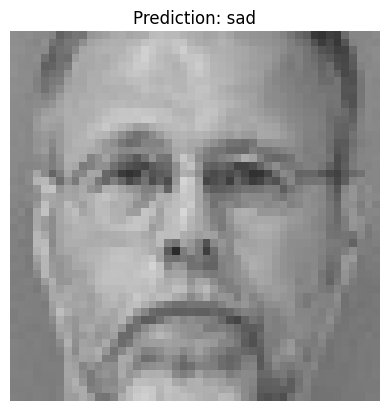

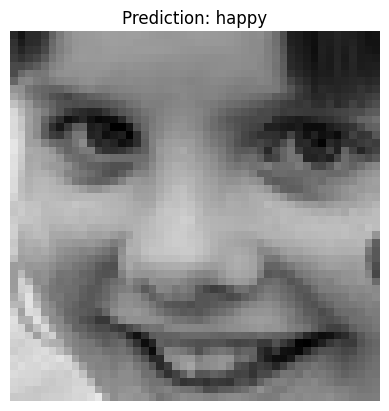

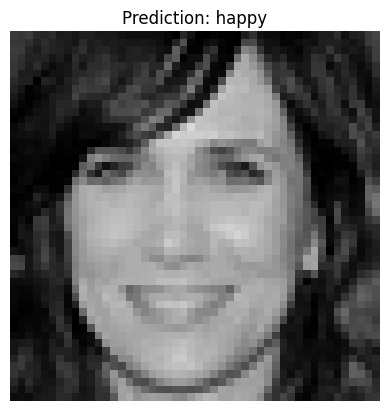

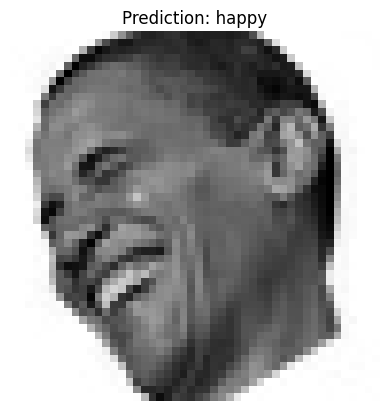

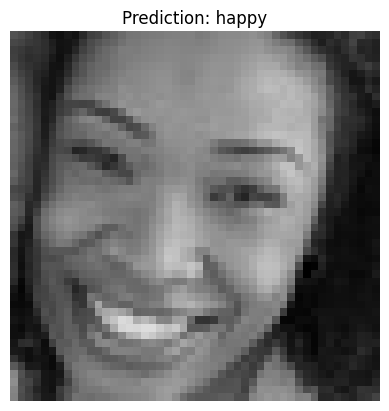

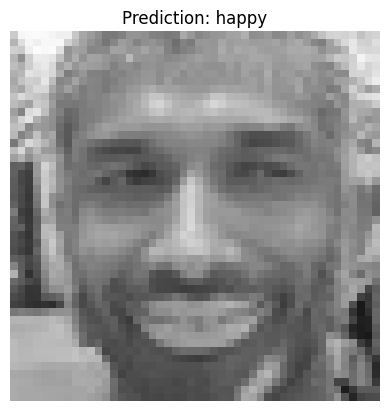

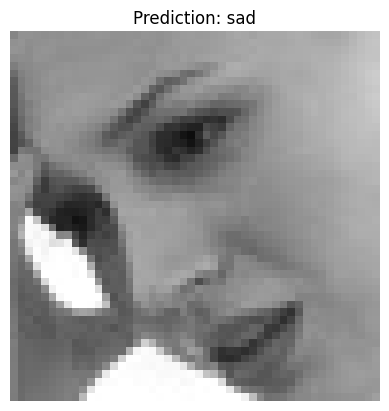

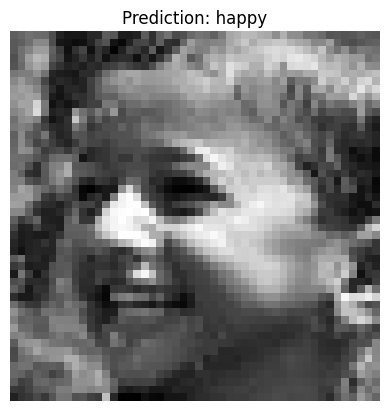

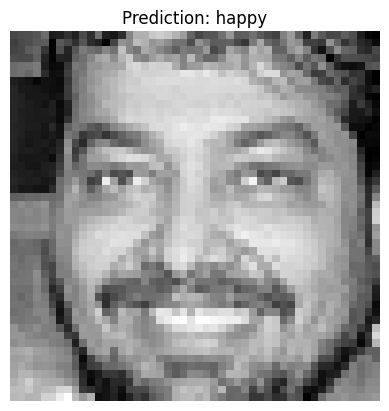

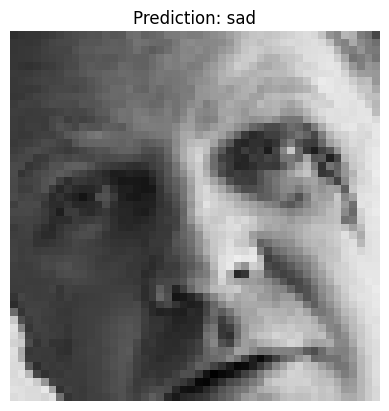

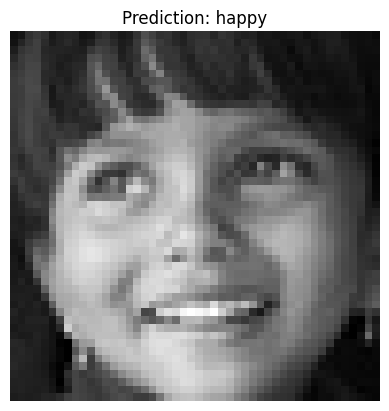

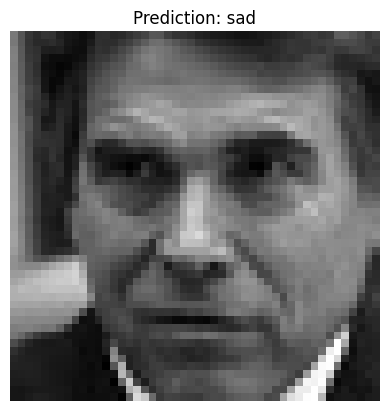

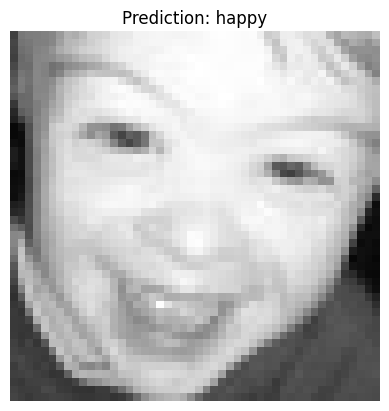

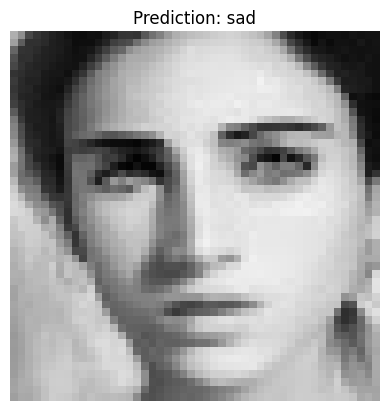

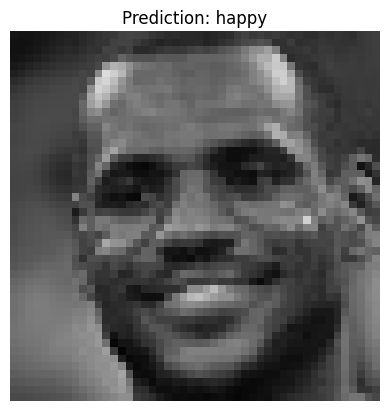

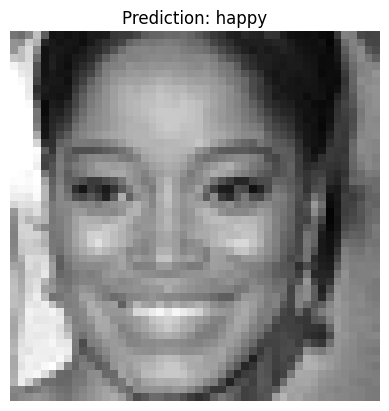

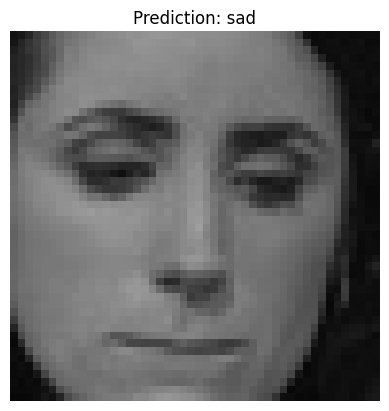

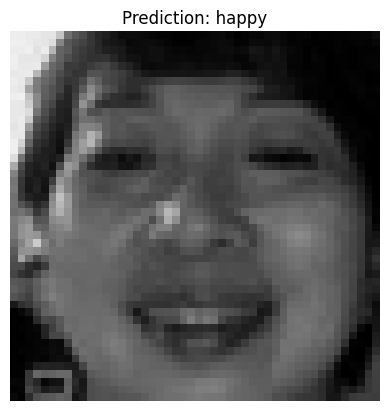

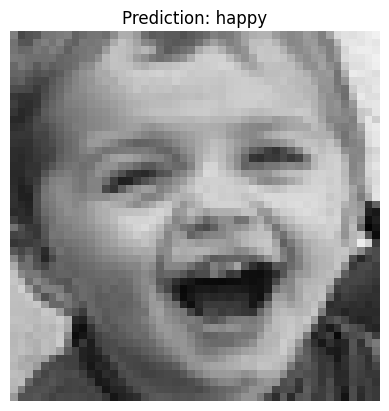

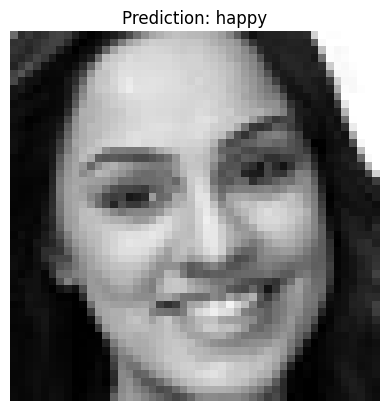

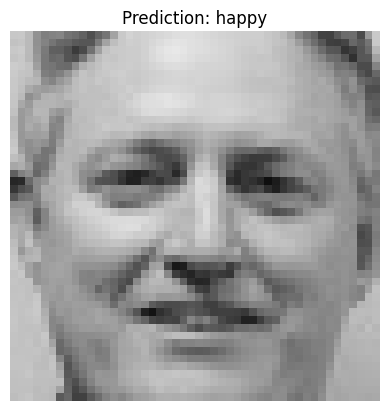

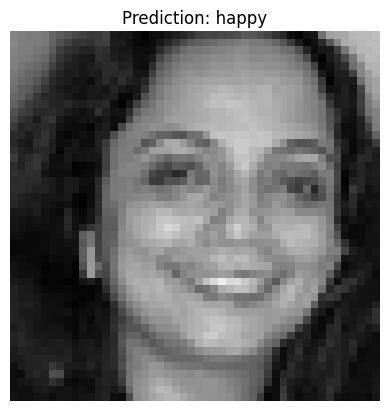

In [35]:
# %% Predict and display results
import numpy as np
import matplotlib.pyplot as plt
class_names = ["happy", "sad"]

# Function to display an image and the predicted label
def display_prediction(image, prediction):
    plt.imshow(image / 255.0)  # Normalize pixel values for display
    plt.title(f"Prediction: {class_names[np.argmax(prediction)]}")
    plt.axis('off')
    plt.show()

# %% Predict on test dataset
for images, labels in test_dataset.take(1):  # Get a batch from the test dataset
    predictions = model.predict(images)
    for i in range(len(images)):
        display_prediction(images[i].numpy(), predictions[i])
